# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('table', attrs={'class' : 'table'})
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charse


Finding row length.

In [5]:
tr = table.find_all('tr')
row_length = len(tr)

Do the scrapping process here (please change this markdown with your explanation)

In [6]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #scrapping process
    row = table.find_all('tr')[i]
    #use the key to take information here
    #name_of_object = row.find_all(...)[0].text
        
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
        
    #get harga_harian
    harga_harian = row.find_all('td')[2].text
    harga_harian = harga_harian.strip() #for removing the excess whitespace
        
    temp.append((tanggal,harga_harian)) #append the needed information  
    
temp = temp[::-1]

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Tanggal', 'Harga_Harian'))
df.head()

,Tanggal,Harga_Harian
0,6/24/2022,"14,829.50000 IDR"
1,6/27/2022,"14,807.70000 IDR"
2,6/28/2022,"14,852.35000 IDR"
3,6/29/2022,"14,868.90000 IDR"
4,6/30/2022,"14,928.80000 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [8]:
# cek tipe data
df.dtypes

Tanggal         object
Harga_Harian    object
dtype: object

In [9]:
# hapus ',' , '.', dan 'IDR'

df['Harga_Harian'] = df['Harga_Harian'].apply(lambda x: x.replace('IDR', ''))
df['Harga_Harian'] = df['Harga_Harian'].apply(lambda x: x.replace(',', ''))
df['Harga_Harian'] = df['Harga_Harian'].apply(lambda x: x.replace('.', ''))

In [10]:
# ubah tipe data
df['Harga_Harian'] = df['Harga_Harian'].astype('int64')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [11]:
# cek kolom Harga_Harian
df['Harga_Harian'].head()

0    1482950000
1    1480770000
2    1485235000
3    1486890000
4    1492880000
Name: Harga_Harian, dtype: int64

In [12]:
# buat dua angka dibelakang koma
df['Harga_Harian'] = round((df['Harga_Harian'] * 0.00001), 2)
df['Harga_Harian']

0      14829.50
1      14807.70
2      14852.35
3      14868.90
4      14928.80
         ...   
123    15543.30
124    15629.40
125    15616.05
126    15567.55
127    15563.50
Name: Harga_Harian, Length: 128, dtype: float64

In [13]:
# cek tipe data
df.dtypes

Tanggal         datetime64[ns]
Harga_Harian           float64
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [14]:
df.head()

,Tanggal,Harga_Harian
0,2022-06-24,14829.50
1,2022-06-27,14807.70
2,2022-06-28,14852.35
3,2022-06-29,14868.90
4,2022-06-30,14928.80


In [15]:
# buat kolom baru period
df['Period'] = df['Tanggal'].dt.to_period('M')
df.head()

,Tanggal,Harga_Harian,Period
0,2022-06-24,14829.50,2022-06
1,2022-06-27,14807.70,2022-06
2,2022-06-28,14852.35,2022-06
3,2022-06-29,14868.90,2022-06
4,2022-06-30,14928.80,2022-06


In [16]:
df[['Period','Harga_Harian']].groupby(by=['Period']).mean().round(2)

,Harga_Harian
Period,
2022-06,14857.45
2022-07,14973.67
2022-08,14831.29
2022-09,15005.16
2022-10,15427.79
2022-11,15652.50
2022-12,15562.59


<AxesSubplot:xlabel='Period'>

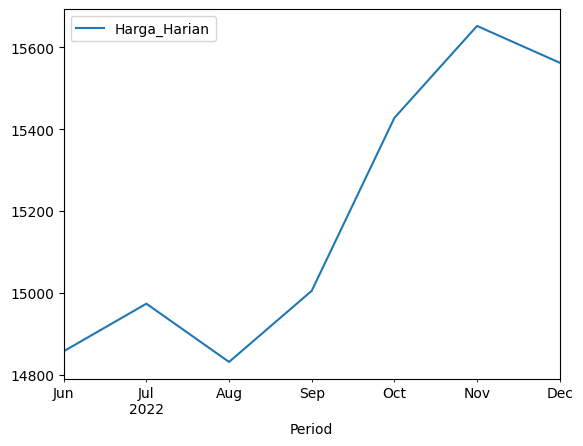

In [17]:
# visualisasi
import matplotlib.pyplot as plt
df[['Period','Harga_Harian']].groupby(by=['Period']).mean().round(2).plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

**Kesimpulan:**
1. Pada bulan Agustus 2022 harga USD terjadi penurunan dari periode sebelumnya
2. Pada bulan Agustus 2022 harga USD merupakan harga terendah dibandingkan semua periode di tahun 2022
3. Harga USD tertinggi terjadi pada bulan November 2022 dibandingkan semua periode di tahun 2022
4. Secara keseluruhan harga USD memiliki trend yang naik dari periode Juli 2022 s/d Desember 2022


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.